<h1>Exploratory Data Analysis of Pipeline Accident Dataset </h1>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
import re
import folium

In [2]:
df_clean = pd.read_csv("df_raw.csv")

In [3]:
def count_missing_values(df):
    missing_value_count = list()
    missing_value_percentage = list()
    column_list = df.columns.tolist()
    total_length = df.shape[0]
    for column in column_list:
        missing_value_count.append(sum(df[column].isna()))
        missing_value_percentage.append((missing_value_count[-1]/total_length)*100)
    #make a dataframe to visualize the missing values
    df_missing_values = pd.DataFrame({'Feature':column_list,'Missing Value Count':missing_value_count,'Missing Value %':missing_value_percentage})
    return df_missing_values
df_missing_values = count_missing_values(df_clean)
display(df_missing_values.style.background_gradient(cmap = 'Reds',axis = 0))

In [6]:
import datetime

In [4]:
def add_accident_year(x):
    x["Accident Year"] = datetime.datetime.strptime(x["Accident Date/Time"], "%m/%d/%Y %H:%M %p").year
    return x

In [7]:
df_clean["Accident Year"] = np.nan
df_clean = df_clean.apply(lambda x: add_accident_year(x), axis = 1)
columns = df_clean.columns.tolist()
columns.remove("Accident Year")
columns.insert(columns.index("Accident Date/Time"),"Accident Year")
df_clean = df_clean[columns]
df_clean.drop('Unnamed: 0', axis = 1, inplace = True)
df_clean.head()

Accident Year Accident Date/Time                         Operator Name  \
0           2010   1/1/2010 7:15 AM                 ONEOK NGL PIPELINE LP   
1           2010   1/4/2010 8:30 AM                PORTLAND PIPELINE CORP   
2           2010  1/5/2010 10:30 AM           PETROLOGISTICS OLEFINS, LLC   
3           2010   1/6/2010 7:30 PM  ENBRIDGE ENERGY, LIMITED PARTNERSHIP   
4           2010   1/7/2010 1:00 PM                 PLAINS PIPELINE, L.P.   

  Pipeline Location Pipeline Type                                 Liquid Type  \
0           ONSHORE   ABOVEGROUND  HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS   
1           ONSHORE   ABOVEGROUND                                   CRUDE OIL   
2           ONSHORE   ABOVEGROUND  HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS   
3           ONSHORE   UNDERGROUND                                   CRUDE OIL   
4           ONSHORE   UNDERGROUND                                   CRUDE OIL   

                                      Liquid Subtype  Accident Latitude  \
0  LPG (LIQUEFIED PETROLEUM GAS) / NGL (NATURAL G...           38.67070   
1                                               None           43.94028   
2                                             ETHANE           30.18240   
3                                               None           46.68930   
4                                               None           33.58266   

   Accident Longitude               Cause Category  ... Lost Commodity Costs  \
0           -97.78123          INCORRECT OPERATION  ...               1517.0   
1           -70.49336  MATERIAL/WELD/EQUIP FAILURE  ...                  8.0   
2           -93.35240  MATERIAL/WELD/EQUIP FAILURE  ...                200.0   
3           -92.06120         NATURAL FORCE DAMAGE  ...                 40.0   
4           -96.64881            EXCAVATION DAMAGE  ...                150.0   

   Public/Private Property Damage Costs  Emergency Response Costs  \
0                                   0.0                       0.0   
1                                   0.0                       0.0   
2                                   0.0                       0.0   
3                                   0.0                   11300.0   
4                                   0.0                    7500.0   

   Environmental Remediation Costs Other Costs All Costs  \
0                              0.0         0.0      1627   
1                              0.0         0.0      4008   
2                              0.0         0.0       200   
3                              0.0         0.0     11540   
4                           2000.0         0.0     29650   

  Time from Incident to Shutdown  Accident after Shutdown  Shutdown Period  \
0                            0.0                      0.0              0.0   
1                            0.0                      0.0              0.0   
2                            0.0                      0.0              0.0   
3                            0.0                      0.0              0.0   
4                            0.0                      0.0              0.0   

   Shutdown Period(Log Scaled)  
0                          0.0  
1                          0.0  
2                          0.0  
3                          0.0  
4                          0.0  

[5 rows x 28 columns]

<h2> Visualizing Accident Locations </h2>

In [10]:
#finding the maximum latitude,longitude and minimum latitude,longitude
mean_lat = np.mean(df_clean["Accident Latitude"])
mean_long = np.mean(df_clean["Accident Longitude"])

In [13]:
map = folium.Map(location = [mean_lat,mean_long], zoom_start = 4, control_scale = True)
map

In [16]:
for op_name,lat,lon in zip(df_clean["Operator Name"],df_clean["Accident Latitude"],df_clean["Accident Longitude"]):
    label = op_name
    folium.CircleMarker([lat,lon],radius = 5, popup = label, color = 'blue', fill = True, fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map)
map

Above map displays the locations of different Pipeline accidents. It is observed that most accidents which are clustered near by are infact operated by the same Pipeline operator

In [22]:
#investigating if Pipeline Operator has a relationship with the All Costs feature
operator_group = df_clean.groupby('Operator Name')
key_list = list()

for key,group in operator_group:
    key_list.append(key)
operator_name = list()
mean_loss_per_incident = list()
total_losses = list()
total_incidents = list()
for key in key_list:
    op_temp = operator_group.get_group(key)
    operator_name.append(key)
    mean_loss_per_incident.append(np.mean(op_temp["All Costs"]))
    total_losses.append(np.sum(op_temp["All Costs"]))
    total_incidents.append(op_temp["All Costs"].shape[0])

operator_losses_df = pd.DataFrame({'Operator Name':operator_name,'Mean Loss Per Incident':mean_loss_per_incident,"Total Losses":total_losses,"Total Incidents":total_incidents})

In [23]:
operator_losses_df

Operator Name  \
0                          ALYESKA PIPELINE SERVICE CO   
1                                         AMOCO OIL CO   
2                                      ASIG - HONOLULU   
3                            BELLE FOURCHE PIPELINE CO   
4    BHP BILLITON PETROLEUM (EAGLE FORD GATHERING) LLC   
..                                                 ...   
224                         WHITE CLIFFS PIPELINE, LLC   
225                 WHITECAP PIPE LINE COMPANY, L.L.C.   
226                            WILLIAMS FIELD SERVICES   
227                              WOLVERINE PIPELINE CO   
228                           WYOMING PIPELINE COMPANY   

     Mean Loss Per Incident  Total Losses  Total Incidents  
0              6.104565e+06      48836519                8  
1              5.050899e+06      15152696                3  
2              2.816000e+06       2816000                1  
3              1.752300e+05       2277990               13  
4              7.622400e+04         76224                1  
..                      ...           ...              ...  
224            7.194640e+05       3597320                5  
225            2.201260e+06       2201260                1  
226            3.210249e+05       2568199                8  
227            6.384443e+05       1915333                3  
228            1.694200e+04        525202               31  

[229 rows x 4 columns]

<h3> Average Loss suffered by Operator per Incident </h3>

In [27]:
top_10_per_incident = operator_losses_df.sort_values(by = "Mean Loss Per Incident", ascending  = False).head(10)
top_10_per_incident

Operator Name  Mean Loss Per Incident  \
137             MOBIL  PIPE  LINE COMPANY            1.309686e+07   
61   ENBRIDGE ENERGY, LIMITED PARTNERSHIP            1.293614e+07   
29     CHEVRON PETROCHEMICAL PIPELINE LLC            6.688306e+06   
0             ALYESKA PIPELINE SERVICE CO            6.104565e+06   
1                            AMOCO OIL CO            5.050899e+06   
14                   BRIDGER PIPELINE LLC            4.067274e+06   
13                      BRIDGER LAKE, LLC            4.000000e+06   
219                WEST SHORE PIPELINE CO            3.869776e+06   
201              THE DOW CHEMICAL COMPANY            3.224990e+06   
80                 EXXONMOBIL PIPELINE CO            3.044215e+06   

     Total Losses  Total Incidents  
137      91678045                7  
61      918465669               71  
29       26753223                4  
0        48836519                8  
1        15152696                3  
14        8134548                2  
13        4000000                1  
219      50307083               13  
201       6449980                2  
80      149166535               49

<h3> Total Loss suffered by Operator per Incident </h3>

In [28]:
top_10_total_loss = operator_losses_df.sort_values(by = "Total Losses", ascending  = False).head(10)
top_10_total_loss

Operator Name  Mean Loss Per Incident  \
61   ENBRIDGE ENERGY, LIMITED PARTNERSHIP            1.293614e+07   
167                 PLAINS PIPELINE, L.P.            1.087877e+06   
80                 EXXONMOBIL PIPELINE CO            3.044215e+06   
40                   COLONIAL PIPELINE CO            7.959458e+05   
30                   CHEVRON PIPE LINE CO            3.019773e+06   
137             MOBIL  PIPE  LINE COMPANY            1.309686e+07   
129                MARATHON PIPE LINE LLC            8.100642e+05   
219                WEST SHORE PIPELINE CO            3.869776e+06   
0             ALYESKA PIPELINE SERVICE CO            6.104565e+06   
179              SHELL PIPELINE CO., L.P.            8.045322e+05   

     Total Losses  Total Incidents  
61      918465669               71  
167     169708804              156  
80      149166535               49  
40      108248631              136  
30      102672298               34  
137      91678045                7  
129      70475582               87  
219      50307083               13  
0        48836519                8  
179      48271931               60

<h3>Operators with the highest number of Incidents</h3>

In [29]:
top_10_most_incidents = operator_losses_df.sort_values(by = "Total Incidents", ascending  = False).head(10)
top_10_most_incidents

Operator Name  Mean Loss Per Incident  \
73         ENTERPRISE CRUDE PIPELINE LLC            1.699723e+05   
185                 SUNOCO PIPELINE L.P.            2.420690e+05   
167                PLAINS PIPELINE, L.P.            1.087877e+06   
74     ENTERPRISE PRODUCTS OPERATING LLC            2.580330e+05   
127        MAGELLAN PIPELINE COMPANY, LP            1.959851e+05   
40                  COLONIAL PIPELINE CO            7.959458e+05   
17                  BUCKEYE PARTNERS, LP            2.233233e+05   
129               MARATHON PIPE LINE LLC            8.100642e+05   
113  KINDER MORGAN LIQUID TERMINALS, LLC            1.676772e+05   
164             PHILLIPS 66 PIPELINE LLC            7.856196e+04   

     Total Losses  Total Incidents  
73       33144604              195  
185      43572418              180  
167     169708804              156  
74       39479052              153  
127      27045940              138  
40      108248631              136  
17       25682180              115  
129      70475582               87  
113      14420238               86  
164       6284957               80

In [30]:
top_10_total_loss.merge(top_10_most_incidents, how = 'inner', on = "Operator Name")

Operator Name  Mean Loss Per Incident_x  Total Losses_x  \
0   PLAINS PIPELINE, L.P.              1.087877e+06       169708804   
1    COLONIAL PIPELINE CO              7.959458e+05       108248631   
2  MARATHON PIPE LINE LLC              8.100642e+05        70475582   

   Total Incidents_x  Mean Loss Per Incident_y  Total Losses_y  \
0                156              1.087877e+06       169708804   
1                136              7.959458e+05       108248631   
2                 87              8.100642e+05        70475582   

   Total Incidents_y  
0                156  
1                136  
2                 87

In [32]:
#repeating above analysis for Shutdown Period
#investigating if Pipeline Operator has a relationship with the All Costs feature
operator_group = df_clean.groupby('Operator Name')
key_list = list()

for key,group in operator_group:
    key_list.append(key)
operator_name = list()
shutdown_per_incident = list()
total_shutdown = list()
total_incidents = list()
for key in key_list:
    op_temp = operator_group.get_group(key)
    operator_name.append(key)
    shutdown_per_incident.append(np.mean(op_temp["Shutdown Period"]))
    total_shutdown.append(np.sum(op_temp["Shutdown Period"]))
    total_incidents.append(op_temp["Shutdown Period"].shape[0])

operator_losses_df = pd.DataFrame({'Operator Name':operator_name,'Shutdown Per Incident':shutdown_per_incident,"Total Shutdown":total_shutdown,"Total Incidents":total_incidents})

In [33]:
top_10_shutdown_per_incident = operator_losses_df.sort_values(by = "Shutdown Per Incident", ascending  = False).head(10)
top_10_shutdown_per_incident

Operator Name  Shutdown Per Incident  \
42              CONSOLIDATED EDISON CO OF NY           2.258328e+07   
202                      THUMS LONG BEACH CO           1.129500e+07   
29        CHEVRON PETROCHEMICAL PIPELINE LLC           5.121915e+06   
141                    MOTIVA ENTERPRISE LLC           3.926451e+06   
182                ST. JAMES OIL CORPORATION           3.887400e+06   
86                GEL OFFSHORE PIPELINE, LLC           3.744600e+06   
181      SKEISUI SPECIALTY CHEMICALS AMERICA           3.501420e+06   
43   COUNTRYMARK REFINING AND LOGISTICS, LLC           3.134680e+06   
225       WHITECAP PIPE LINE COMPANY, L.L.C.           3.114600e+06   
131          MARKWEST MICHIGAN PIPELINE, LLC           2.838600e+06   

     Total Shutdown  Total Incidents  
42     2.258328e+07                1  
202    1.129500e+07                1  
29     2.048766e+07                4  
141    3.141161e+07                8  
182    3.887400e+06                1  
86     3.744600e+06                1  
181    3.501420e+06                1  
43     9.404040e+06                3  
225    3.114600e+06                1  
131    5.677200e+06                2

In [34]:
top_10_total_shutdown = operator_losses_df.sort_values(by = "Total Shutdown", ascending  = False).head(10)
top_10_total_shutdown

Operator Name  Shutdown Per Incident  \
80                EXXONMOBIL PIPELINE CO           1.956958e+06   
185                 SUNOCO PIPELINE L.P.           4.937333e+05   
127        MAGELLAN PIPELINE COMPANY, LP           5.512787e+05   
73         ENTERPRISE CRUDE PIPELINE LLC           3.268396e+05   
30                  CHEVRON PIPE LINE CO           1.516192e+06   
74     ENTERPRISE PRODUCTS OPERATING LLC           3.210526e+05   
117          KOCH PIPELINE COMPANY, L.P.           1.282373e+06   
113  KINDER MORGAN LIQUID TERMINALS, LLC           4.336221e+05   
141                MOTIVA ENTERPRISE LLC           3.926451e+06   
179             SHELL PIPELINE CO., L.P.           4.800680e+05   

     Total Shutdown  Total Incidents  
80     9.589092e+07               49  
185    8.887200e+07              180  
127    7.607647e+07              138  
73     6.373372e+07              195  
30     5.155053e+07               34  
74     4.912105e+07              153  
117    4.616543e+07               36  
113    3.729150e+07               86  
141    3.141161e+07                8  
179    2.880408e+07               60

In [35]:
top_10_total_shutdown.merge(top_10_most_incidents, how = 'inner', on = "Operator Name")

Operator Name  Shutdown Per Incident  Total Shutdown  \
0                 SUNOCO PIPELINE L.P.          493733.314571    8.887200e+07   
1        MAGELLAN PIPELINE COMPANY, LP          551278.741220    7.607647e+07   
2        ENTERPRISE CRUDE PIPELINE LLC          326839.601845    6.373372e+07   
3    ENTERPRISE PRODUCTS OPERATING LLC          321052.631220    4.912105e+07   
4  KINDER MORGAN LIQUID TERMINALS, LLC          433622.075700    3.729150e+07   

   Total Incidents_x  Mean Loss Per Incident  Total Losses  Total Incidents_y  
0                180           242068.988889      43572418                180  
1                138           195985.072464      27045940                138  
2                195           169972.328205      33144604                195  
3                153           258033.019608      39479052                153  
4                 86           167677.186047      14420238                 86

Investigate the correlation between Shutdown Period and Total Loss

<AxesSubplot:xlabel='Shutdown Period', ylabel='All Costs'>

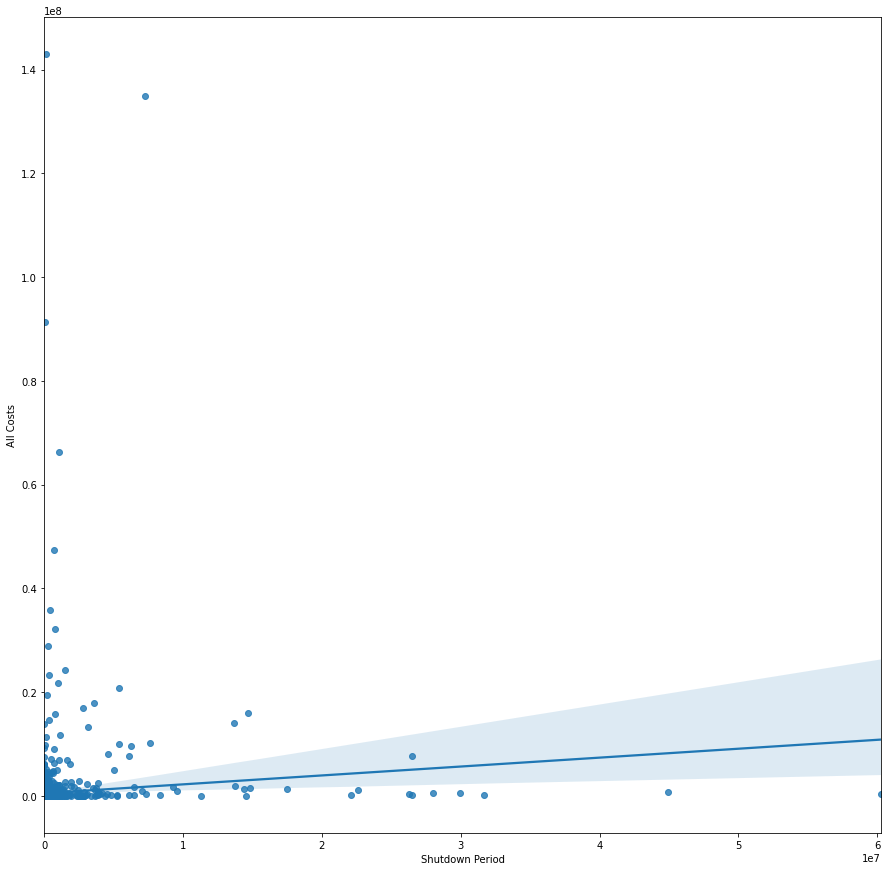

In [40]:
fig,ax_reg = plt.subplots(1,1,figsize = (15,15))
temp_df = df_clean.copy()
temp_df.drop(df_clean.loc[df_clean["All Costs"] == df_clean["All Costs"].describe()['max']].index.tolist(), axis = 0,inplace = True)
sns.regplot(x = "Shutdown Period", y = "All Costs", data = temp_df, ax = ax_reg)

Accident Year Accident Date/Time                         Operator Name  \
193           2010  7/25/2010 5:58 PM  ENBRIDGE ENERGY, LIMITED PARTNERSHIP   

    Pipeline Location Pipeline Type Liquid Type Liquid Subtype  \
193           ONSHORE   UNDERGROUND   CRUDE OIL           None   

     Accident Latitude  Accident Longitude               Cause Category  ...  \
193           42.24329           -84.97251  MATERIAL/WELD/EQUIP FAILURE  ...   

    Lost Commodity Costs  Public/Private Property Damage Costs  \
193             126118.0                            23000000.0   

     Emergency Response Costs  Environmental Remediation Costs Other Costs  \
193               177000000.0                      635000000.0   2400000.0   

     All Costs Time from Incident to Shutdown  Accident after Shutdown  \
193  840526118                        62340.0                      0.0   

     Shutdown Period  Shutdown Period(Log Scaled)  
193        5438760.0                       6.7355  

[1 rows x 28 columns]